### EVALUACIÓ DEL MODEL LINEAR-SVC

El Regressor Logístic i el LinearSVC son els models que millor funcionen i d'aquests agafarem el millor: el LinearSVC té un 90% d'accuracy i s'executa en 2,3 sec. el LogisticRegression té un 88% d'accuracy pero triga 18 segons en executar!
Llavors agafarem el 'LinearSVC' perque te un major accuracy i s'executa molt més ràpid.

Experimentarem amb la Màquina de vectors de suport Lineal (LinearSVC) i calibrarem el nostre model.

In [17]:
# Probem el classificador de LINEAR_SVC:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df.index, test_size=0.3, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

# Calibrem el model i mirem la seva accuracy:
calibrated_svc = CalibratedClassifierCV(base_estimator=model, cv="prefit")
calibrated_svc.fit(X_train,y_train)
predicted = calibrated_svc.predict(X_test)
print("Accuracy calibrat: %.3f" % metrics.accuracy_score(y_test, predicted))
#print(y_test.shape)
#print(predicted)

0.9350961538461539
Accuracy calibrat: 0.933


A continuació mostro la matriu de confusió on podrem apreciar les dades de classificació que ha fet el nostre model:

<IPython.core.display.Javascript object>


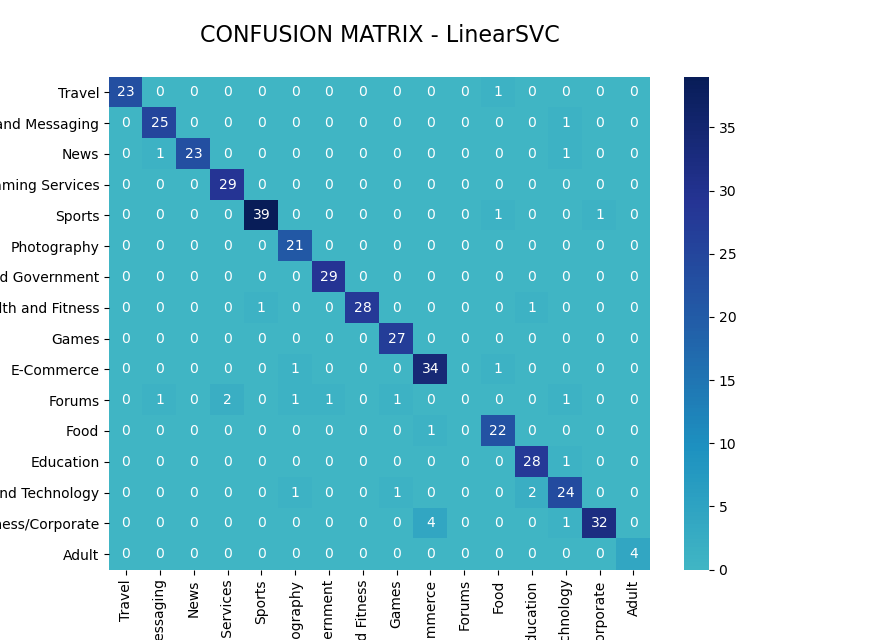

In [18]:
# Mirem la matriu de confusió:
conf_mat = confusion_matrix(y_test, predicted,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d', center=0, cmap='YlGnBu',
            xticklabels=category_id_df.Category.values, 
            yticklabels=category_id_df.Category.values)

plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [17]:
# Classification report
print('MÈTRIQUES DE CLASSIFICACIÓ:\n')
print(metrics.classification_report(y_test,predicted,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],target_names= df['Category'].unique()))

MÈTRIQUES DE CLASSIFICACIÓ:

                                 precision    recall  f1-score   support

                          Adult       1.00      0.96      0.98        24
             Business/Corporate       0.93      0.96      0.94        26
       Computers and Technology       1.00      0.92      0.96        25
                     E-Commerce       0.94      1.00      0.97        29
                      Education       0.97      0.95      0.96        41
                           Food       0.87      0.95      0.91        21
                         Forums       0.97      1.00      0.98        29
                          Games       1.00      0.93      0.97        30
             Health and Fitness       0.93      0.93      0.93        27
             Law and Government       0.83      0.94      0.88        36
                           News       0.00      0.00      0.00         7
                    Photography       0.88      0.96      0.92        23
Social Networking and

C:\Users\oscar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


micro avg = mitjana pero tenint més en compte les classes de major frequencia, i menys les menors.
macro avg = mitjana de les 16 classes per igual.
weighted avg = mitjana dels pesos.

Hi han certs errors en la nostra classificació que es poden apreciar en la matriu de confusió. Tots els elements que estiguin en la diagonal vol dir que estàn ben classificats, i els que no obviament no ho estàn.
A continuació mostraré les classificacions erronies que ha fet el nostre model i amb quina classe s'han equivocat:

In [19]:
for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] > 0: # Mostra tots els errors
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual],id_to_category[predicted],
                                                                   conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Category', 'cleaned_website_text']])

'News' predicted as 'Social Networking and Messaging' : 1 examples.


,Category,cleaned_website_text
544,News,bloomberg robot bloomberg detect unusual activ...


'Forums' predicted as 'Social Networking and Messaging' : 1 examples.


,Category,cleaned_website_text
854,Forums,alternate history discussion forum search disc...


'Forums' predicted as 'Streaming Services' : 2 examples.


,Category,cleaned_website_text
861,Forums,wattpad story live wattpad connect global comm...
850,Forums,india forums latest entertainment news india f...


'Health and Fitness' predicted as 'Sports' : 1 examples.


,Category,cleaned_website_text
675,Health and Fitness,ellen broken jaw tips tips people suffer broke...


'E-Commerce' predicted as 'Photography' : 1 examples.


,Category,cleaned_website_text


'Forums' predicted as 'Photography' : 1 examples.


,Category,cleaned_website_text
853,Forums,aviation forums skip content search search qui...


'Computers and Technology' predicted as 'Photography' : 1 examples.


,Category,cleaned_website_text
1228,Computers and Technology,flipcode archives welcome flipcode archives fi...


'Forums' predicted as 'Law and Government' : 1 examples.


,Category,cleaned_website_text
862,Forums,india skyscrapercity namaste city ahmedabad be...


'Forums' predicted as 'Games' : 1 examples.


,Category,cleaned_website_text
852,Forums,aelyria forward forums welcome aelyria page au...


'Computers and Technology' predicted as 'Games' : 1 examples.


,Category,cleaned_website_text
1214,Computers and Technology,retrosoftware main page retro software homebre...


'Food' predicted as 'E-Commerce' : 1 examples.


,Category,cleaned_website_text
863,Food,deliciously ella live well useful vegetable co...


'Business/Corporate' predicted as 'E-Commerce' : 4 examples.


,Category,cleaned_website_text
1361,Business/Corporate,buy brand gps electronics accessories cheap gp...
1360,Business/Corporate,laptop computers desktops printers ink toner h...
1367,Business/Corporate,thrive market healthy living easy buy healthy ...
1308,Business/Corporate,sale combs wrecker sale hurry sell opportunity...


'Travel' predicted as 'Food' : 1 examples.


,Category,cleaned_website_text
99,Travel,toggle navigation menu lang lang cultureui hom...


'Sports' predicted as 'Food' : 1 examples.


,Category,cleaned_website_text
294,Sports,diario gol real madrid messi diariogol james r...


'E-Commerce' predicted as 'Food' : 1 examples.


,Category,cleaned_website_text
872,E-Commerce,pioneer woman recipes country life style enter...


'Health and Fitness' predicted as 'Education' : 1 examples.


,Category,cleaned_website_text
668,Health and Fitness,page find learn ayurveda cart oops page find t...


'Computers and Technology' predicted as 'Education' : 2 examples.


,Category,cleaned_website_text
1175,Computers and Technology,quantum algorithms quantum computing blog quan...
1231,Computers and Technology,lambda ultimate programming languages weblog l...


'Social Networking and Messaging' predicted as 'Computers and Technology' : 1 examples.


,Category,cleaned_website_text
323,Social Networking and Messaging,good dating site singles meeting russian girl ...


'News' predicted as 'Computers and Technology' : 1 examples.


,Category,cleaned_website_text
565,News,index index modified size description


'Forums' predicted as 'Computers and Technology' : 1 examples.


,Category,cleaned_website_text
855,Forums,ars technica openforum index page hardware twe...


'Education' predicted as 'Computers and Technology' : 1 examples.


,Category,cleaned_website_text
1014,Education,calculator home page calculator software onlin...


'Business/Corporate' predicted as 'Computers and Technology' : 1 examples.


,Category,cleaned_website_text
1341,Business/Corporate,freelancer freelance jobs freelance projects f...


'Sports' predicted as 'Business/Corporate' : 1 examples.


,Category,cleaned_website_text
256,Sports,sport job sport news sport feature sports mana...


Evaluarem de nou el test per trobar els termes més relacionats amb les categories que ha escollit el nostre model d'entrenament

In [20]:
# Tornem a evaluar el test per trobar els termes més relacionats amb les categories:
model.fit(features, labels)

N = 5
for Category, category_id in sorted(category_to_id.items()):
    # Eliminem el chi2 perque volem les dades del nostre model:
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("\n '{}' ==>".format(Category))
    print("  · Top unigrams: %s" %(', '.join(unigrams)))
    print("  · Top bigrams: %s" %(', '.join(bigrams)))


 'Adult' ==>
  · Top unigrams: sex, bdsm, erotic, bondage, xxx
  · Top bigrams: sex toys, year old, big cock, site offer, anal sex

 'Business/Corporate' ==>
  · Top unigrams: investment, client, business, company, services
  · Top bigrams: real estate, audio visual, year experience, site work, home products

 'Computers and Technology' ==>
  · Top unigrams: software, file, web, windows, programming
  · Top bigrams: source code, web hosting, come soon, easy use, programming language

 'E-Commerce' ==>
  · Top unigrams: shipping, grocery, item, delivery, gift
  · Top bigrams: free shipping, grocery shopping, gift card, add cart, online grocery

 'Education' ==>
  · Top unigrams: science, university, chemistry, student, earth
  · Top bigrams: open access, state university, case study, periodic table, real world

 'Food' ==>
  · Top unigrams: recipe, cake, restaurant, tasty, menu
  · Top bigrams: order online, gluten free, home menu, plant base, breakfast lunch

 'Forums' ==>
  · Top uni

Podem veure que les paraules tenen sentit dins de la categoria a la que pertanyen, per tant hem fet una bona feina.